In [1]:
from __future__ import print_function
import os
import shutil

import dendropy
from dendropy.interop import raxml

In [7]:
ebov_data = dendropy.DnaCharacterMatrix.get_from_path('trim_ebov.fasta', 'fasta')
print(ebov_data.taxon_set)
rx = raxml.RaxmlRunner()
ebov_tree = rx.estimate_tree(ebov_data, ['-m', 'GTRGAMMA', '-N', '10'])
del ebov_data

TaxonSet(EBOV_2014_KM233113 18956 bp, EBOV_2014_KM233114 18956 bp, EBOV_2014_KM233115 18956 bp, EBOV_2014_KM233116 18956 bp, EBOV_2014_KM233117 18956 bp, EBOV_2014_KM034556 18956 bp, EBOV_2014_KM034557 18956 bp, EBOV_2014_KM034558 18956 bp, EBOV_2014_KM034560 18956 bp, EBOV_2014_KM233118 18956 bp, EBOV_2014_KM034559 18956 bp, EBOV_2014_KM034561 18956 bp, EBOV_2014_KM034562 18956 bp, EBOV_2014_KM034563 18956 bp, EBOV_1976_AF272001 18956 bp, EBOV_1976_KC242801 18956 bp, EBOV_1995_KC242796 18956 bp, EBOV_1995_KC242799 18956 bp, EBOV_2007_KC242784 18956 bp, EBOV_2007_KC242785 18956 bp, EBOV_2007_KC242787 18956 bp, EBOV_2007_KC242786 18956 bp, EBOV_2007_KC242789 18956 bp, EBOV_2007_KC242788 18956 bp, EBOV_2007_KC242790 18956 bp)
Use raxml with AVX support (8 cpus)


Using BFGS method to optimize GTR rate parameters, to disable this specify "--no-bfgs" 


This is the RAxML Master Pthread

This is RAxML Worker Pthread Number: 4

This is RAxML Worker Pthread Number: 1

This is RAxML Worker Pth

[RAxML run failed]:

raxmlHPC -m GTRCAT -s /tmp/tmpDjoJPD/dendropy_raxml.seqs -n dendropy_raxml -p 1477185860828278151 -m GTRGAMMA -N 10

raxmlHPC-PTHREADS-AVX: models.c:3551: initGeneric: Assertion `ext_EIGN[(l - 1)] > 0.0' failed.
Aborted (core dumped)


SystemExit: 134

To exit: use 'exit', 'quit', or Ctrl-D.


In [11]:
ebola_data = dendropy.DnaCharacterMatrix.get_from_path('trim.fasta', 'fasta')
rx = raxml.RaxmlRunner()
ebola_tree = rx.estimate_tree(ebola_data, ['-m', 'GTRGAMMA', '-N', '10'])
del ebola_data

In [ ]:
ebola_tree.write_to_path('my_ebola.nex', 'nexus')
ebov_tree.write_to_path('my_ebov.nex', 'nexus')

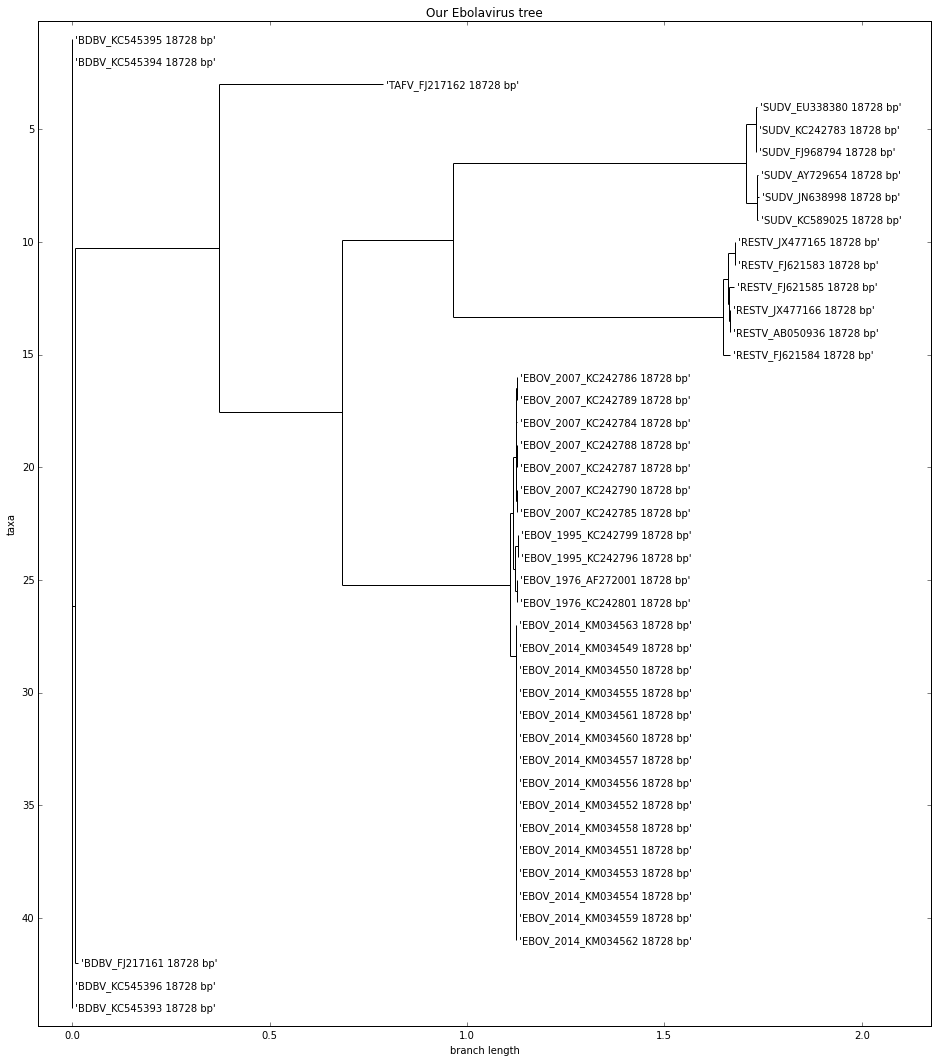

In [12]:
import matplotlib.pyplot as plt
from Bio import Phylo
%matplotlib inline
my_ebola_tree = Phylo.read('my_ebola.nex', 'nexus')
my_ebola_tree.name = 'Our Ebolavirus tree'

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(my_ebola_tree, axes=ax)

## RAxML with Biopython

In [13]:
import random
import sys
from Bio.Phylo.Applications import RaxmlCommandline
raxml_cline = RaxmlCommandline(sequences='trim_ebov.fasta',
                               model='GTRGAMMA', name='biopython',
                               num_replicates='10',
                               parsimony_seed=random.randint(0, sys.maxint),
                               working_dir=os.getcwd() + os.sep + 'bp_rx')
print(raxml_cline)
try:
    os.mkdir('bp_rx')
except OSError:
    shutil.rmtree('bp_rx')
    os.mkdir('bp_rx')
out, err = raxml_cline()

raxmlHPC -m GTRGAMMA -n biopython -p 8047376830910942226 -s trim_ebov.fasta -w /home/tra/book/bioinf-python/notebooks/05_Phylo/bp_rx -N 10


In [14]:
from Bio import Phylo
biopython_tree = Phylo.read('bp_rx/RAxML_bestTree.biopython', 'newick')

In [15]:
print(biopython_tree)

Tree(weight=1.0, rooted=False)
    Clade(branch_length=0.0)
        Clade(branch_length=0.000111135574771, name='BDBV_KC545395')
        Clade(branch_length=4.27319582832e-07)
            Clade(branch_length=0.000165381995508)
                Clade(branch_length=0.00647327289859)
                    Clade(branch_length=0.00717896096992, name='BDBV_FJ217161')
                    Clade(branch_length=0.364193943462)
                        Clade(branch_length=0.31225913252)
                            Clade(branch_length=0.279590277066)
                                Clade(branch_length=0.741387302012)
                                    Clade(branch_length=0.0242825107217)
                                        Clade(branch_length=0.00247949838035, name='SUDV_EU338380')
                                        Clade(branch_length=0.000159185290449)
                                            Clade(branch_length=0.000918434160139, name='SUDV_FJ968794')
                                   